## <font color=blue> Stats507  , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 2 , *Problem 2*: 2

Persons discussed idea about: Hongru Fang
***
**REQUIRE MODULE:**

In [1]:
import re
from collections import deque
import urllib.request
from collections import Counter
from random import randrange
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from scipy import stats

### Problem 1 Implementing a Basic Data Structure (6 points)

#### 1.1:
Define a class called a **Trie**, which supports the following methods:

• **_\__init_\__(self)** : takes no arguments. Initializes an empty dictionary called
root as the only instance attribute of the Trie object. This dictionary will
serve as the data structure described in the previous paragraph.

• **add(self,s)** : takes a string s as its only argument. Adds s to the trie represented by self.root according to the procedure described in the paragraph
above.

• **contains(self,s)** : takes a string s as its only argument and returns a
boolean, which is True if and only if the string s is represented in the trie.

• **_\__repr_\__(self)** : takes no arguments. Returns a string representing the object. When you try to print an object, Python calls this method (if it exists).
See https://docs.python.org/3.6/reference/datamodel.html#object.__
repr__ for more information. In our case, let’s just say that calling the Trie.__repr__
method just returns the string representation of the dictionary, which you’ll recall is stored as self.root.

In [2]:
class Trie(object):
    
    def __init__(self):
        '''
        constructor for Trie object, initialize
        the root for the tree, HashMap/dict implementation
        for the root, which is instance attributes
        search TC(O(1)) 
        '''
        self.root = dict()
    def string_mapper(self,s):
        '''
        function output desired char list
        format of the input string, stripping puncuations
        and lower-casing. function does feature error checking
        
        TC(O(N))
        auxillary SC(O(1)) since we return the char_list
        '''
        #error checking for input type
        if not isinstance(s, str):
            raise TypeError("input should be a string Type")
        if not s or len(s)==0:
            raise ValueError("invlid inputs or NULL input")
        #regex pattern to output desired list
        clean_string = re.compile(r'[\w]')
        if clean_string.findall(s):
            #store character into a list
            char_list = clean_string.findall(s.lower())
        else:
            raise ValueError("input strings does not contains valid chars")
        return char_list
        
    def add(self,s):
        '''
        function takes string s, and adds it to 
        according root 
        '''
        #get the char of list
        chars = self.string_mapper(s)
        #reference to the root for dictionary manipulation
        current_node = self.root
        for char in chars:
            if char not in current_node:
                #always a nested dict
                current_node[char] = {}
            #update inner dict
            #reference to previous {}
            current_node = current_node[char]
        #end of the word has key "",value None
        current_node[""] = None
    def contains(self,s):
        '''
        function takes a string s, and 
        output boolean according to whether
        string s is represented in the trie
        '''
        #get the char of list
        chars = self.string_mapper(s)
        cur_node = self.root
        for char in chars:
            #if the first char doesn't exist
            if char not in cur_node:
                return False
            else:
                #continue updating cur_node
                cur_node = cur_node[char]
        #when exist the for loop, if "" in cur_node
        #then exist, else not existed
        return True if "" in cur_node else False
    def __repr__(self):
        '''
        operating function to implement printing
        crude or ambinugous information in the class
        '''
        return str(self.root)
    #############optional printing###########################
    def print_helper(self, dic:dict):
        """
        same result as the __print_dict_helper
        """
        #base case when leads to end
        if not isinstance(dic,dict):
            return [""]
        else:
            words = []
            for key in dic.keys():
                next_level = self.print_helper(dic[key])
                for element in next_level:
                    words.append(key+element)
        return words
    def __print_dict_helper(self, dic: dict):
        '''
        recursive function helper for printing the 
        words in the dictionary
        TC:O(N)
        SC:O(N)
        '''
        words = []
        for key, value in dic.items():
            if key != "" and isinstance(value, dict):
                for char in self.__print_dict_helper(value):
                    words.append(key+char)
            else:
                words.append("")
        return words
    def __str__(self):
        '''
        operating function for output a 
        detailed string for information in the class
        '''
        words_list = self.__print_dict_helper(self.root)
        return "Trie contains: "+", ".join(words_list)

In [3]:
example = Trie()
example.add("nihao'>&")
example.add("nicao")
example.add("nisha")
example.add("hi")
example.add("h")
example.root

{'n': {'i': {'h': {'a': {'o': {'': None}}},
   'c': {'a': {'o': {'': None}}},
   's': {'h': {'a': {'': None}}}}},
 'h': {'i': {'': None}, '': None}}

In [4]:
example1 = Trie()
example1.add("dog")
example1.add("d")
example1

{'d': {'o': {'g': {'': None}}, '': None}}

In [5]:
print(example.contains("h"))
print(example.contains("hi"))

True
True


In [6]:
print(example)
example.__repr__()

Trie contains: nihao, nicao, nisha, hi, h


"{'n': {'i': {'h': {'a': {'o': {'': None}}}, 'c': {'a': {'o': {'': None}}}, 's': {'h': {'a': {'': None}}}}}, 'h': {'i': {'': None}, '': None}}"

#### 1.2:
Write  a  function  called **wordlist2trie** that  takes  a  list  of  strings  as  input  and returns a Trie object representing the collection of strings in the input list.  Your function should perform error checking to verify that the input is indeed a list andthat all its elements are strings.  Note that we could just as well have implemented a method in the Trie class to do this, if we wanted.

In [7]:
def wordlist2trie(words):
    '''
    takes an input of list of words
    returns a Trie object
    '''
    #error checking
    if not isinstance(words, list) or \
        not all([isinstance(i,str) for i in words]):
        raise TypeError("input should be list of strings")
    if not words or len(words) < 1:
        raise TypeError("invalid input")
    trie_obj = Trie()
    for string in words:
        trie_obj.add(string)
    return trie_obj

In [8]:
wordlist2trie(["ABC", "Abc","ab","abd","wx","wyx"]).root

{'a': {'b': {'c': {'': None}, '': None, 'd': {'': None}}},
 'w': {'x': {'': None}, 'y': {'x': {'': None}}}}

In [9]:
wordlist2trie(["ABC", "Abc","ab","abd","wx","wyx"])

{'a': {'b': {'c': {'': None}, '': None, 'd': {'': None}}}, 'w': {'x': {'': None}, 'y': {'x': {'': None}}}}

#### 1.3:
Download the word list fromhttp://www.greenteapress.com/thinkpython/code/words.txt(or read it directly usingurliborrequests), and use **wordlist2trie** to build a trie representing the words in the word list.  Save the result in a variablecalled **big_trie**.

Retrieve using urlib

In [10]:
words_txt = urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
#note i did not strip the newlines
big_words_list = [line.decode("ascii",errors = "ignore").strip() for line in words_txt]  

In [11]:
big_trie = wordlist2trie(big_words_list)

In [12]:
len({i[0] for i in big_words_list}) == len(Counter(big_trie.root.keys()))

True

### Problem 2 Comparing Sorting Algorithms (4 points)

#### 2.1:
below sorting algorithms are self-implemented, I didn't resort to any wikipages, and Merge_sort would be implemented based on partitioning recursion using method of divide and conquer(top-down), quick_sort would be implemented the method of pivot, sentinal and partitioning, bubble_sort is implemented by swaping each element with the larger one to the very right of the array
***
Firstly, define a function used for error checking to avoid extensive error checking calls

In [13]:
def valid_array(arr):
    '''
    error checking ensuring valid list of ints/floats
    '''
    if not isinstance(arr,list) or \
        not all([isinstance(i,(int,
                               float)) for i in arr]):
        return False
    else: return True

**merge_sort:** implemented using method of divide and conquer/top-down

In [14]:
def mergesort(arr):
    '''
    return a sorted array
    TC(O(Nlog(N)))--O(N) to merge Log(N) levels
    SC(O(N+log(N))) ~ O(N)
    '''
    #error check
    if not valid_array(arr):
        raise TypeError("please input valid list of numbers")
    #base case in recursion
    if len(arr) == 0 or len(arr) == 1:
        return arr
    #divide
    mid = len(arr)//2
    #seperate into left subarray anf right one
    #recurse until one element left in each part
    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])
    #then merge to ensure each recursion,
    #left and right are sorted
    return merge(left, right)
def merge(arr1, arr2):
    '''
    function merges of two sorted array
    into a larger sorted array
    TC(O(N))
    SC(O(N))
    '''
    #two pointers 
    i = j = 0
    result_array = []
    #traverse thru array and append the smaller element
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            result_array.append(arr1[i])
            #keep traversing
            i += 1
        else:
            result_array.append(arr2[j])
            j += 1
    #below is excecuted when two arrays are different length
    #append the remaining elements, noticed that remaining
    #elements are all sorted, so we extend it
    while i < len(arr1):
        result_array.append(arr1[i])
        i += 1
    while j < len(arr2):
        result_array.append(arr2[j])
        j += 1
    return result_array

In [15]:
mergesort([3,5,1,2,4,8,100,-2,-3,-5,100,1,0.2,100,-9,-100])

[-100, -9, -5, -3, -2, 0.2, 1, 1, 2, 3, 4, 5, 8, 100, 100, 100]

**quick_sort:** For quick_sort, I wrote an in-place version with partition swapping, due to the fact I would try to implement a in-place quick_sort to optimize the Space Complexity to an average of **O(log(N))** due to recursion, which is better than the **O(N)+O(log(N))**. Furthermore, last element in the input list is pivot

In [16]:
def partition(arr, start, end, pivot_index):
    '''
    partitioning function to return a new index(sentinal)
    , ensuring the items to the left of sentinal  
    are less than the pivot, items in the array that are
    on the right of sentinal are greater than the pivot
    '''
    #put the pivot value to the end of the array, so we only
    #compare the items ///optional since we choosing the last
    #index as pivot
    arr[pivot_index], arr[end] = arr[end], arr[pivot_index]
    #assign sentinal index
    sentinal = start
    #pivot node is at the end initially
    pivot = arr[end]
    for i in range(start, end):
        #make sure left of sentinal are all less than pivot
        if arr[i] < pivot:
            arr[i], arr[sentinal] = arr[sentinal],arr[i]
            #keep move the sentinal
            sentinal += 1
    #swap the sentinal back
    arr[sentinal],arr[end] = arr[end],arr[sentinal]
    return sentinal

def quicksort_helper(arr, start, end):
    #base case
    if start >= end: return 
    #pivot index is last one
    pivot_index = end
    new_pivot_index = partition(arr,start,end, pivot_index)
    #keep updating the arrary in two subarray
    quicksort_helper(arr, start, new_pivot_index-1)
    quicksort_helper(arr, new_pivot_index+1, end)

In [17]:
def quicksort_inplace(arr):
    #error check
    if not valid_array(arr):
        raise TypeError("please input valid list of numbers")
    if len(arr) == 1: return arr
    #modify the original array
    quicksort_helper(arr, 0, len(arr) - 1)
    return arr

In [18]:
quicksort_inplace([3,5,1,2,4,8,100,-2,-3,-5,100,1,0.2,100,-9,-100])

[-100, -9, -5, -3, -2, 0.2, 1, 1, 2, 3, 4, 5, 8, 100, 100, 100]

##### Below is the quick_sort in class(but change the pivot index to the last element)

In [19]:
def quicksort(t):
    #error check
    if not valid_array(t):
        raise TypeError("please input valid list of numbers")
    if len(t) <= 1:
        return t
    less,mid,more = [],[],[]
    #last element as the pivot value
    pivot = t[-1]
    #print(pivot)
    mid.append(pivot)
    for i in range(0,len(t)-1):
        if t[i] < pivot:
            less.append(t[i])
        elif t[i] == pivot:
            mid.append(t[i])
        else: # t[i] > pivot
            more.append(t[i])
    return quicksort(less) + mid + quicksort(more)

In [20]:
quicksort([3,5,1,2,4,8,100,-2,-3,-5,100,1,0.2,100,-9,-100])

[-100, -9, -5, -3, -2, 0.2, 1, 1, 2, 3, 4, 5, 8, 100, 100, 100]

**bubble_sort:** simply swapping between larger and smaller

In [21]:
def bubblesort(arr):
    '''
    return a sorted arr, traversing thru the array,
    if the item is larger than the item on the right
    then swap them
    TC(O(N^2))
    SC(O(1)) - constant auxillary SC
    '''
    if not valid_array(arr):
        raise TypeError("please input valid list of numbers")
    #starting from the end
    for i in range(len(arr)-1, 0, -1):
        for j in range(i):
            #if following elemnet greater than previous one
            if arr[j+1] < arr[j]:
                #we sawp them
                arr[j+1],arr[j] = arr[j],arr[j+1]
    return arr

In [22]:
bubblesort([3,5,1,2,4,8,100,-2,-3,-5,100,1,0.2,100,-9,-100])

[-100, -9, -5, -3, -2, 0.2, 1, 1, 2, 3, 4, 5, 8, 100, 100, 100]

#### 2.2: 
Write a function called **run_timing_expt**, which takes a
list of numbers (ints and/or floats) as its only input. Calling this function should
run each of the three sorting algorithms implemented in the previous subproblem
on the given list, timing each call. The function should return a tuple of floats
**(t_merge,t_quick,t_bubble)** corresponding to the times that it took to sort the
input list with merge sort, quicksort and bubble sort, respectively.

In [23]:
def run_timing_expt(arr):
    #error checking
    if not valid_array(arr):
        raise TypeError("please input valid list of numbers")
    ####mergesort############
    start_merge = time.time()
    mergesort(arr)
    end_merge = time.time()
    ####quicksort############
    start_quick = time.time()
    quicksort(arr)
    end_quick = time.time()
    ####bubblesort###########
    start_bubble = time.time()
    bubblesort(arr)
    end_bubble = time.time()
    (t_merge,t_quick,t_bubble) = (abs(start_merge-end_merge),
                                  abs(start_quick-end_quick),
                                  abs(start_bubble-end_bubble))
    return (t_merge,t_quick,t_bubble)

In [24]:
sample_list = [random.random() for _ in range(240)]

In [25]:
run_timing_expt(sample_list)

(0.0016560554504394531, 0.0011820793151855469, 0.0055119991302490234)

#### 2.3:
For
n = 500, 1000, 1500, 2000, 2500, call **run_timing_expt(list(range(n)))** twenty
times. Make a plot that shows the average runtime of the three sorting algorithms
as a function of the input size n. Please include error bars in your plot indicating 2
standard errors of the mean. Give your plot an appropriate title, and label the axes.
Save your plot as **ascending.pdf** and include it in your submission

In [26]:
ranges_n = [500, 1000, 1500, 2000, 2500]

In [27]:
def plot_sort_time_ascending(plot_title:str, plot_pdf_name:str):
    ranges_n = [500, 1000, 1500, 2000, 2500]
    merge_time, quick_time, bubble_time = [],[],[]
    for i in range(20):
        for n in ranges_n:
            time_tuple = run_timing_expt(list(range(n)))
            merge_time.append([n,time_tuple[0]])
            quick_time.append([n,time_tuple[1]])
            bubble_time.append([n,time_tuple[2]])
    #average
    avg_merge, avg_quick, avg_bubble = [],[],[]
    for n in ranges_n:
        avg_merge.append(sum([i[1] for i in merge_time if i[0]==n])/20)
        avg_quick.append(sum([i[1] for i in quick_time if i[0]==n])/20)
        avg_bubble.append(sum([i[1] for i in bubble_time if i[0]==n])/20)
    #standard error
    err_merge,err_quick,err_bubble = [],[],[]
    for n in ranges_n:
        err_merge.append(stats.sem([i[1] for i in merge_time if i[0]==n]))
        err_quick.append(stats.sem([i[1] for i in quick_time if i[0]==n]))
        err_bubble.append(stats.sem([i[1] for i in bubble_time if i[0]==n]))
    #convert np array for stderr calc
    err_merge = np.array(err_merge)
    err_quick = np.array(err_quick)
    err_bubble = np.array(err_bubble)
    #plot of merge_sort
    pic = plt.figure(figsize=(15,25))
    plt.errorbar(x = ranges_n, y = avg_merge, xerr = 0, yerr = 2*err_merge, label = "Mergesort", fmt = "r-*")
    #plot of quick_sort
    plt.errorbar(x = ranges_n, y = avg_quick, xerr = 0, yerr = 2*err_quick, label = "Quicksort", fmt = "b-*")
    #plot of quick_sort
    plt.xlabel("size of the array", fontsize = 19)
    plt.ylabel("mean runtime in seconds of sorting algo", fontsize = 19)
    plt.title("sample mean for each size of array", fontsize = 19)
    plt.errorbar(x = ranges_n, y = avg_bubble, xerr = 0, yerr = 2*err_bubble, label = "Bubblesort", fmt = "g-*")
    plt.suptitle(plot_title, fontsize=25)
    subs=['one','two','three']
    pic.legend(loc='upper left', numpoints=1)
    _ = plt.show()
    pic.savefig(plot_pdf_name)

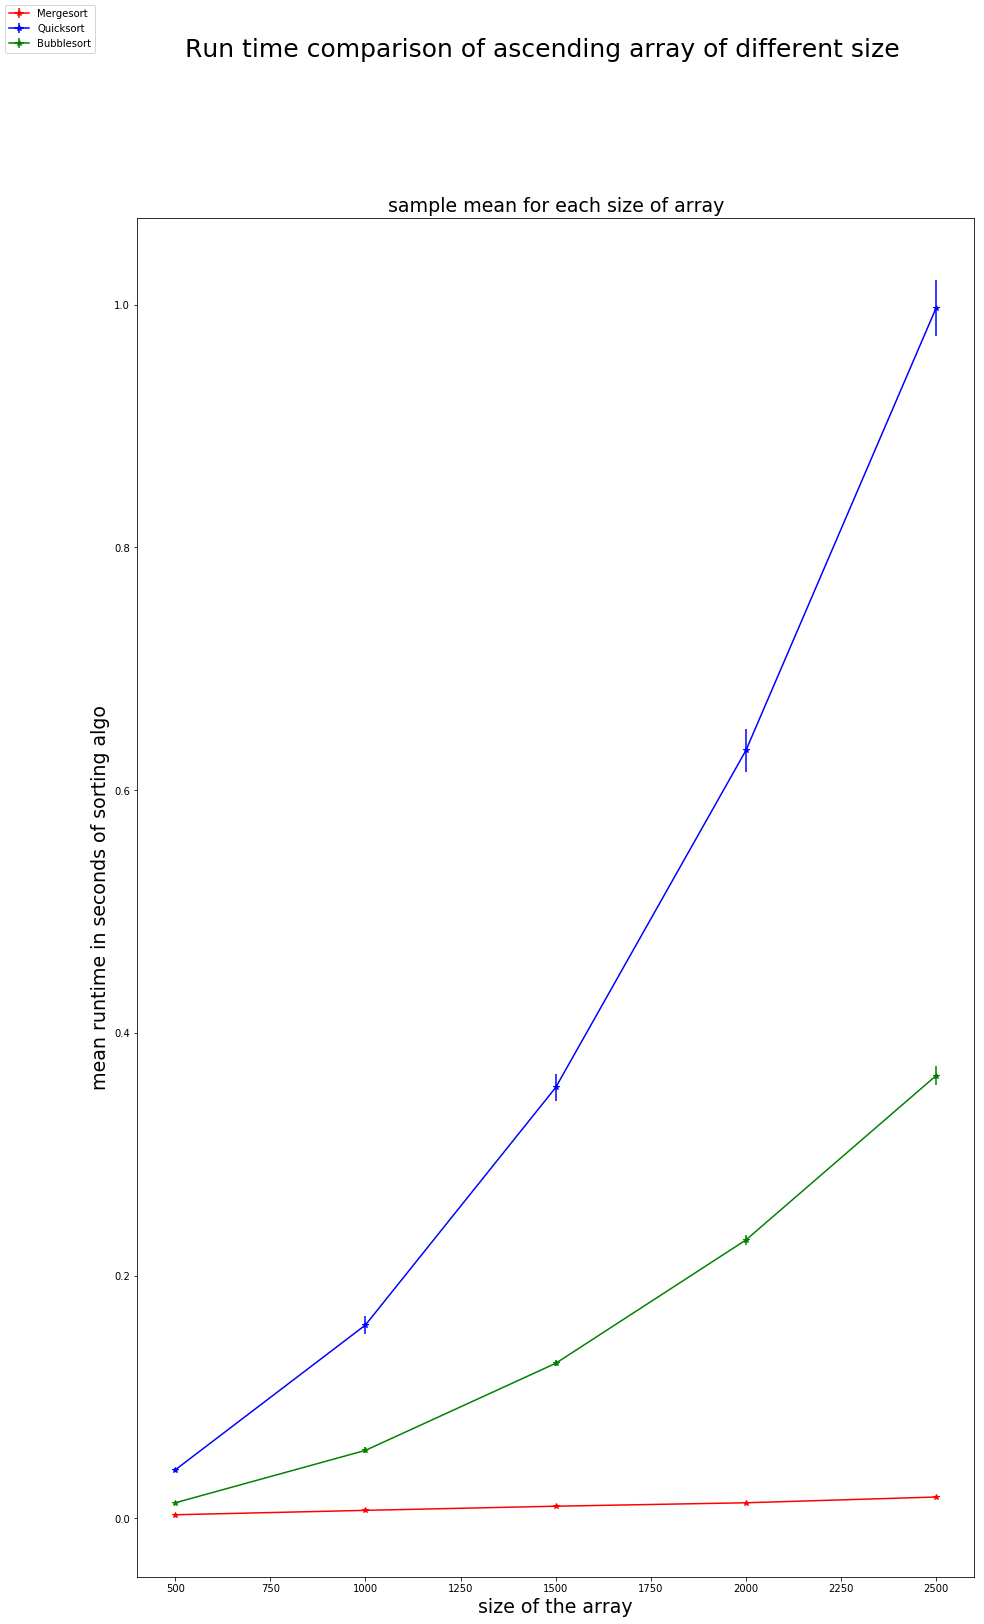

In [28]:
plot_sort_time_ascending("Run time comparison of ascending array of different size", "ascending.pdf" )

#### Explanation of the worst case:
1. 
analysis of **quick sort** befaviour in already sorted array:

As the worst case of run time complexity happens when input array is already sorted, which is exactly is the above case, (every pivot is already the largest, in that there are always excessive elements(n-1) in each traversing of the array size n, since we moves the smaller value to the left and larger ones to the right), in that the time complexity becomes O(N^2), and with that, the recursion stack reaches size N instead of an average size of log(N). That means, when we have an array size 2500, the internal recursion stack has size 2500 as well, which is an unhealthy occurance in terms of space/time, inviting the infamous **"stack overflow"**.

As confirmed in the plot, quicksort has the worst run time 
***

#### 2.4: 
Run the same experiment, but this time with the input being a list sorted in descending order. That is, you should run twenty trials of
**run_timing_expt(sorted(list(range(n)), reverse=True))**
for n = 500, 1000, 1500, 2000, 2500. Again make a plot summarizing the results and
including an appropriate title and axis labels. Please include error bars in your plot
indicating 2 standard errors of the mean. Save your plot as **descending.pdf** and
include it in your submission.

In [29]:
def plot_sort_time_descending(plot_title:str, plot_pdf_name:str):
    ranges_n = [500, 1000, 1500, 2000, 2500]
    merge_time, quick_time, bubble_time = [],[],[]
    for i in range(20):
        for n in ranges_n:
            time_tuple = run_timing_expt(sorted(list(range(n)), reverse=True))
            merge_time.append([n,time_tuple[0]])
            quick_time.append([n,time_tuple[1]])
            bubble_time.append([n,time_tuple[2]])
    #average
    avg_merge, avg_quick, avg_bubble = [],[],[]
    for n in ranges_n:
        avg_merge.append(sum([i[1] for i in merge_time if i[0]==n])/20)
        avg_quick.append(sum([i[1] for i in quick_time if i[0]==n])/20)
        avg_bubble.append(sum([i[1] for i in bubble_time if i[0]==n])/20)
    #standard error
    err_merge,err_quick,err_bubble = [],[],[]
    for n in ranges_n:
        err_merge.append(stats.sem([i[1] for i in merge_time if i[0]==n]))
        err_quick.append(stats.sem([i[1] for i in quick_time if i[0]==n]))
        err_bubble.append(stats.sem([i[1] for i in bubble_time if i[0]==n]))
    #convert np array for stderr calc
    err_merge = np.array(err_merge)
    err_quick = np.array(err_quick)
    err_bubble = np.array(err_bubble)
    #plot of merge_sort
    pic = plt.figure(figsize=(15,25))
    plt.errorbar(x = ranges_n, y = avg_merge, xerr = 0, yerr = 2*err_merge, label = "Mergesort", fmt = "r-*")
    #plot of quick_sort
    plt.errorbar(x = ranges_n, y = avg_quick, xerr = 0, yerr = 2*err_quick, label = "Quicksort", fmt = "b-*")
    #plot of quick_sort
    plt.xlabel("size of the array", fontsize = 19)
    plt.ylabel("mean runtime in seconds of sorting algo", fontsize = 19)
    plt.title("sample mean for each size of array", fontsize = 19)
    plt.errorbar(x = ranges_n, y = avg_bubble, xerr = 0, yerr = 2*err_bubble, label = "Bubblesort", fmt = "g-*")
    plt.suptitle(plot_title, fontsize=25)
    subs=['one','two','three']
    pic.legend(loc='upper left', numpoints=1)
    _ = plt.show()
    pic.savefig(plot_pdf_name)

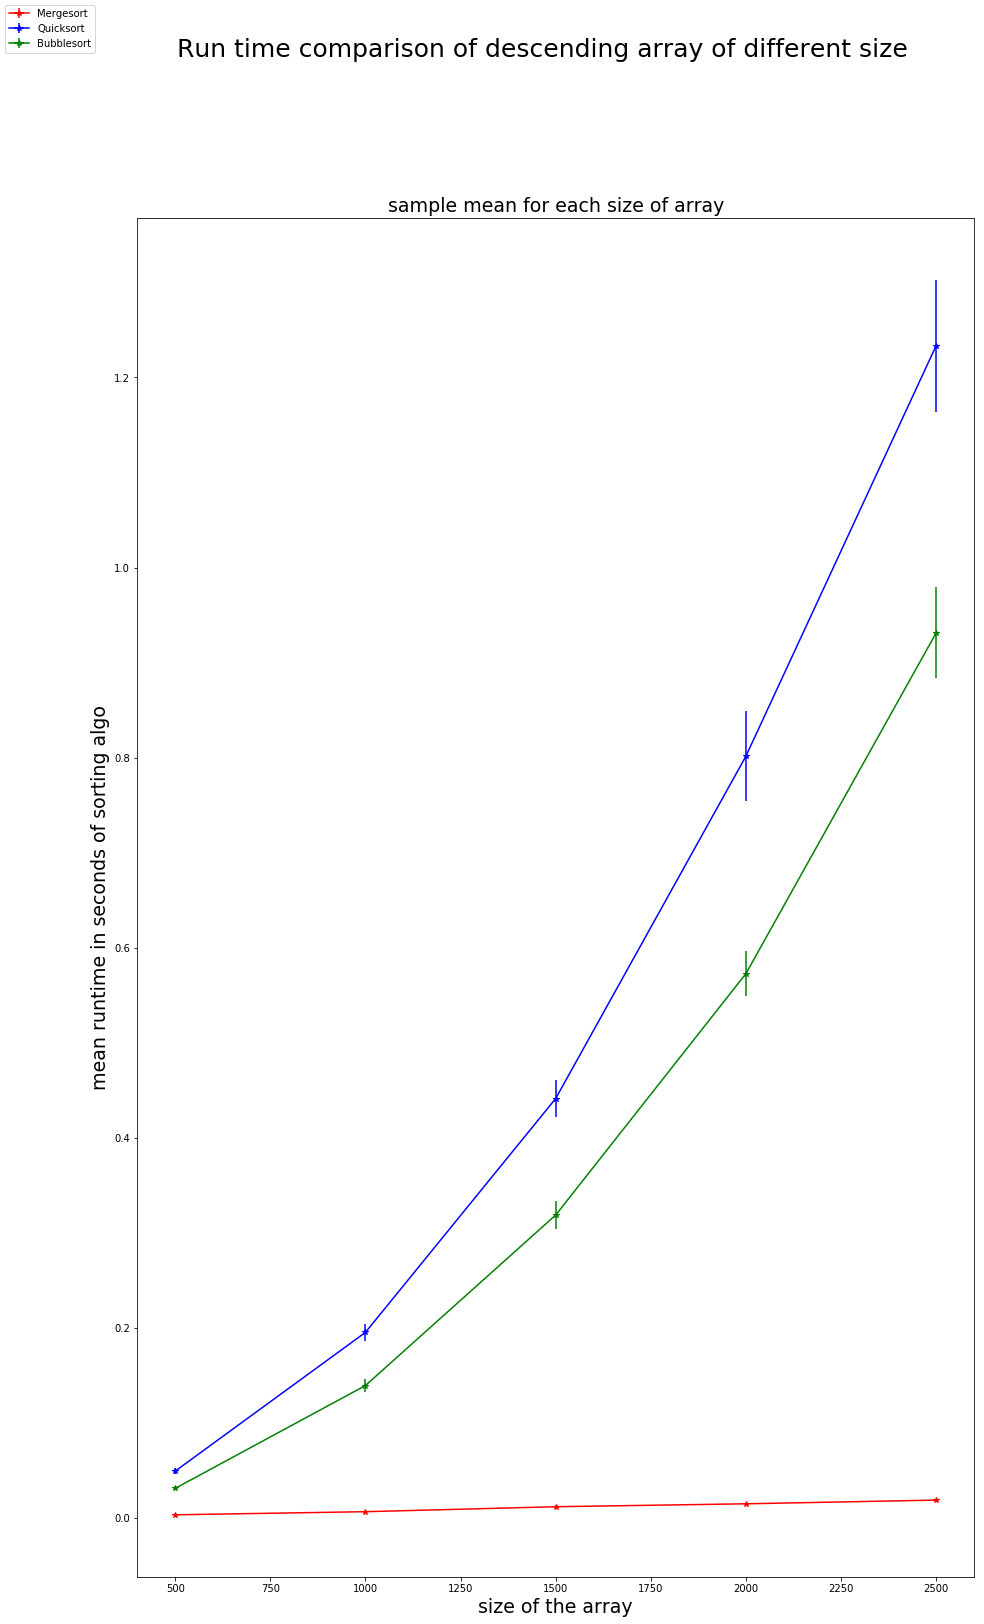

In [30]:
plot_sort_time_descending("Run time comparison of descending array of different size", 
                         "descending.pdf" )

#### explaination:

As we explained in 2.3: in a descending/ascending array, when always picking the last element in the input array as the pivot, there's always n-1 elements to be compared and especially moved, in that run time becomes O(N^2), further explaination refer to 2.3

#### 2.5:
Run the same experiment, but this time on random inputs. That is, for each value
of n in the previous subproblem, run 20 independent trials of
**run_timing_expt([random.random() for _ in range(n)])**
Again make a plot summarizing the results and including an appropriate title and
axis labels. Please include error bars in your plot indicating 2 standard errors of the
mean. Save your plot as **random.pdf** and include it in your submission.

In [31]:
def plot_sort_time_random(plot_title:str, plot_pdf_name:str):
    ranges_n = [500, 1000, 1500, 2000, 2500]
    merge_time, quick_time, bubble_time = [],[],[]
    for i in range(20):
        for n in ranges_n:
            time_tuple = run_timing_expt([random.random() for _ in range(n)])
            merge_time.append([n,time_tuple[0]])
            quick_time.append([n,time_tuple[1]])
            bubble_time.append([n,time_tuple[2]])
    #average
    avg_merge, avg_quick, avg_bubble = [],[],[]
    for n in ranges_n:
        avg_merge.append(sum([i[1] for i in merge_time if i[0]==n])/20)
        avg_quick.append(sum([i[1] for i in quick_time if i[0]==n])/20)
        avg_bubble.append(sum([i[1] for i in bubble_time if i[0]==n])/20)
    #standard error
    err_merge,err_quick,err_bubble = [],[],[]
    for n in ranges_n:
        err_merge.append(stats.sem([i[1] for i in merge_time if i[0]==n]))
        err_quick.append(stats.sem([i[1] for i in quick_time if i[0]==n]))
        err_bubble.append(stats.sem([i[1] for i in bubble_time if i[0]==n]))
    #convert np array for stderr calc
    err_merge = np.array(err_merge)
    err_quick = np.array(err_quick)
    err_bubble = np.array(err_bubble)
    #plot of merge_sort
    pic = plt.figure(figsize=(15,25))
    plt.errorbar(x = ranges_n, y = avg_merge, xerr = 0, yerr = 2*err_merge, label = "Mergesort", fmt = "r-*")
    #plot of quick_sort
    plt.errorbar(x = ranges_n, y = avg_quick, xerr = 0, yerr = 2*err_quick, label = "Quicksort", fmt = "b-*")
    #plot of quick_sort
    plt.xlabel("size of the array", fontsize = 19)
    plt.ylabel("mean runtime in seconds of sorting algo", fontsize = 19)
    plt.title("sample mean for each size of array", fontsize = 19)
    plt.errorbar(x = ranges_n, y = avg_bubble, xerr = 0, yerr = 2*err_bubble, label = "Bubblesort", fmt = "g-*")
    plt.suptitle(plot_title, fontsize=25)
    subs=['one','two','three']
    pic.legend(loc='upper left', numpoints=1)
    _ = plt.show()
    pic.savefig(plot_pdf_name)

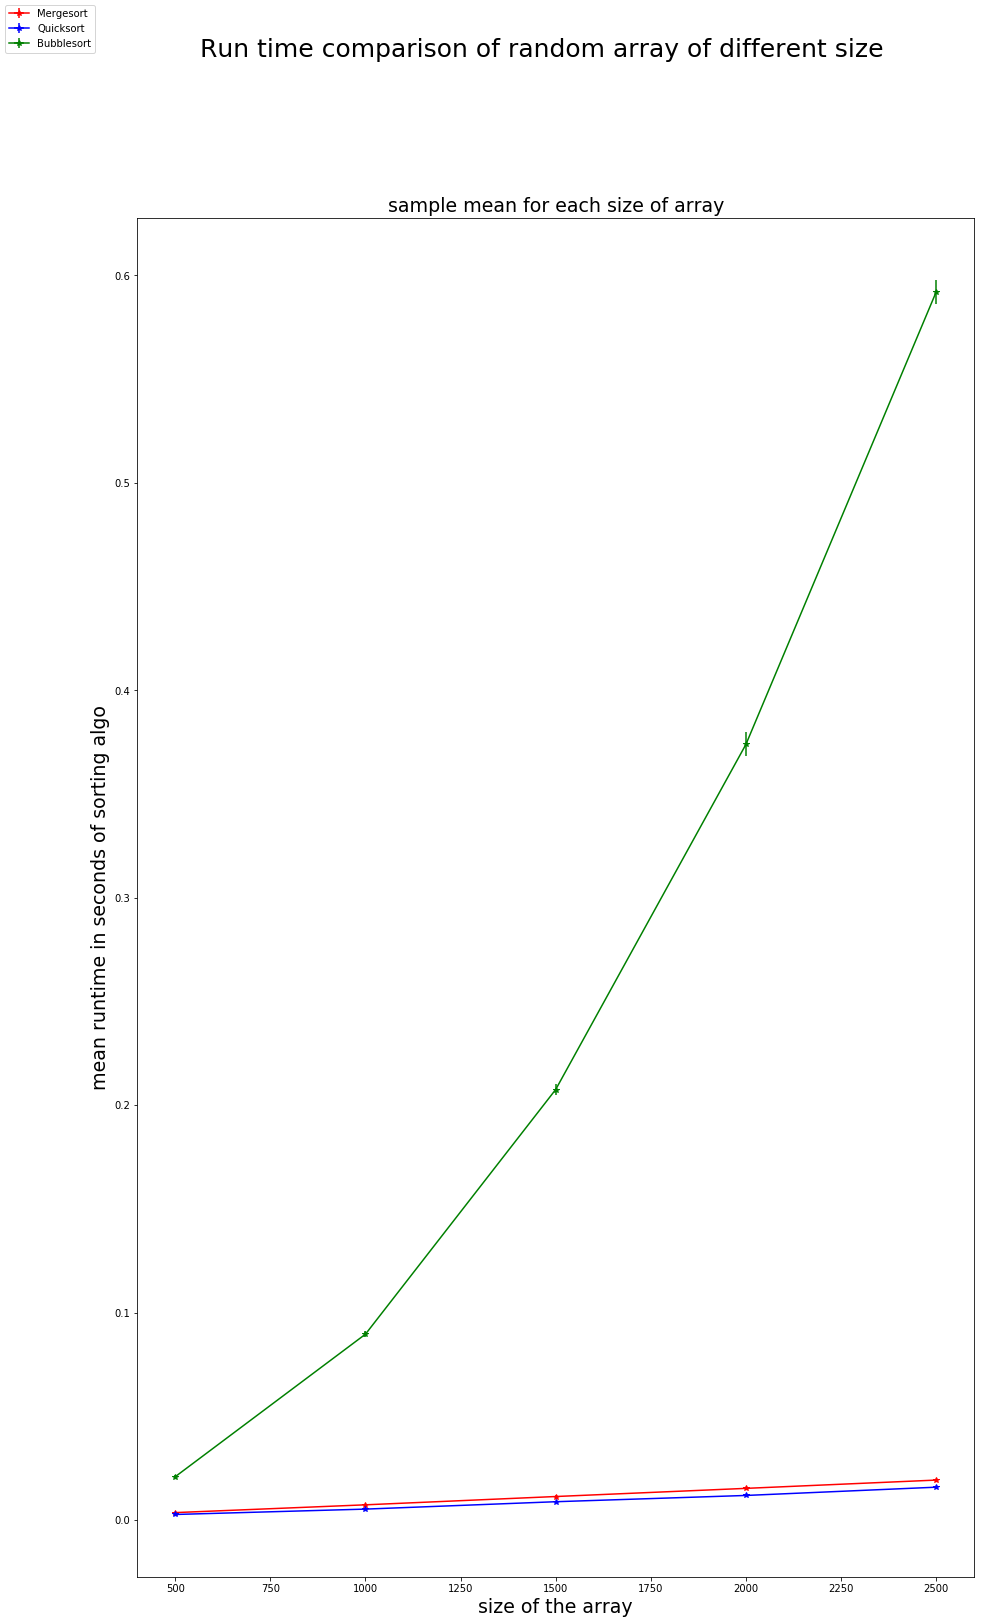

In [32]:
plot_sort_time_random("Run time comparison of random array of different size", 
                         "random.pdf" )

Now that's a **quick** sort